In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
import cv2
from tqdm import tqdm
import os

2024-08-13 12:42:43.295796: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
for dirname,_,_ in os.walk("./Rice_Image_Dataset/"): 
    print(dirname)

./Rice_Image_Dataset/
./Rice_Image_Dataset/Karacadag
./Rice_Image_Dataset/Ipsala
./Rice_Image_Dataset/Arborio
./Rice_Image_Dataset/Basmati
./Rice_Image_Dataset/Jasmine


In [3]:
classNames=sorted(os.listdir("./Rice_Image_Dataset/"))
print(classNames)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag', 'Rice_Citation_Request.txt']


In [4]:
labels=['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [5]:
imgPath="./Rice_Image_Dataset/"

In [6]:
imgList=[]
labelList=[]
for label in labels: 
    for img in os.listdir(imgPath+label): 
        imgList.append(imgPath+label+"/"+img)
        labelList.append(label)

In [7]:
imgList[:2],labelList[:2]

(['./Rice_Image_Dataset/Arborio/Arborio (14999).jpg',
  './Rice_Image_Dataset/Arborio/Arborio (10173).jpg'],
 ['Arborio', 'Arborio'])

In [8]:
import pandas as pd
df=pd.DataFrame({'images':imgList,'labels':labelList})
df

,images,labels
0,./Rice_Image_Dataset/Arborio/Arborio (14999).jpg,Arborio
1,./Rice_Image_Dataset/Arborio/Arborio (10173).jpg,Arborio
2,./Rice_Image_Dataset/Arborio/Arborio (2810).jpg,Arborio
3,./Rice_Image_Dataset/Arborio/Arborio (3702).jpg,Arborio
4,./Rice_Image_Dataset/Arborio/Arborio (6500).jpg,Arborio
...,...,...
74995,./Rice_Image_Dataset/Karacadag/Karacadag (1010...,Karacadag
74996,./Rice_Image_Dataset/Karacadag/Karacadag (1396...,Karacadag
74997,./Rice_Image_Dataset/Karacadag/Karacadag (1267...,Karacadag
74998,./Rice_Image_Dataset/Karacadag/Karacadag (9420...,Karacadag


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  75000 non-null  object
 1   labels  75000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


<Axes: xlabel='labels', ylabel='count'>

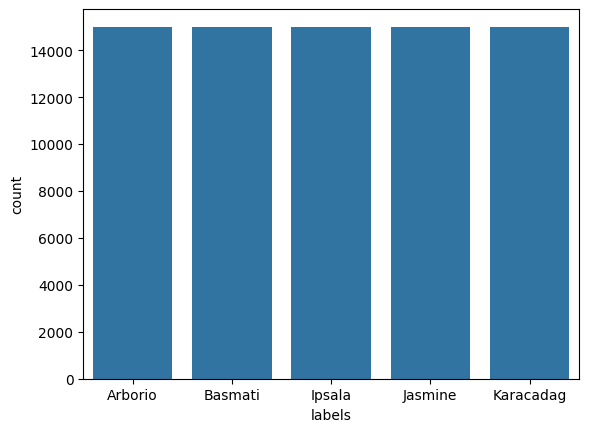

In [10]:
import seaborn as sns
sns.countplot(x="labels",data=df)

In [11]:
imgList=[]
for imgPath in df['images']: 
    img=cv2.imread(imgPath)
    if img is not None:
        img=cv2.resize(img,(64,64))
        img=img/255.0
        imgList.append(img)
    else: 
        print(f"Image path not found: {imgPath}")

In [12]:
x=np.array(imgList)

In [13]:
x.shape

(75000, 64, 64, 3)

In [14]:
df['labels']=df['labels'].map({'Arborio':0, 'Basmati':1, 'Ipsala':2, 'Jasmine':3, 'Karacadag':4})

In [15]:
y=df['labels']

In [16]:
y.shape

(75000,)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
X_train = X_train.astype('float32') / 255

In [19]:
from keras.models import Sequential
model=Sequential()

In [20]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [21]:
# Convolutional Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2), strides=2))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))

# Flatten the output
model.add(Flatten())

# Dense Layers
model.add(Dense(16384, activation='relu'))  # Updated to match the output size of Flatten
model.add(Dense(10, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16384)          │   205,537,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       163,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,720,522 (784.76 MB)

 Trainable params: 205,720,522 (784.76 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from keras.optimizers import Adam

In [24]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=1, batch_size=64, validation_split=0.2)

750/750 ━━━━━━━━━━━━━━━━━━━━ 1458s 2s/step - accuracy: 0.7435 - loss: 0.6111 - val_accuracy: 0.9574 - val_loss: 0.1221


In [26]:
model.save("rice_classification.h5")

In [36]:
from tensorflow.keras.models import load_model
loadedModel=load_model("./rice_classification.h5")
def loadImg(imgPath): 
    img = tf.keras.preprocessing.image.load_img(imgPath, target_size=(64, 64))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array=img_array/255.0
    return img_array

In [ ]:
testFolder="./Rice_Image_Dataset"
def predictImagesInFolder(testFolder): 
    for subdir,dirs,files in os.walk(testFolder): 
        if subdir==testFolder: 
            continue
        trueLabel=os.path.basename(subdir)
        for file in files: 
            img_path=os.path.join(subdir,file)
            img=loadImg(img_path)
            predictions=loadedModel.predict(img)
            predicted_class=np.argmax(predictions,axis=1)
            print(f"Predicted class: {predicted_class[0]} File: {file}")
predictImagesInFolder(testFolder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted class: 4 File: Karacadag (12521).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class: 0 File: Karacadag (1341).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted class: 2 File: Karacadag (6484).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted class: 2 File: Karacadag (9771).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class: 2 File: Karacadag (8863).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: 0 File: Karacadag (4143).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted class: 0 File: Karacadag (3686).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted class: 2 File: Karacadag (2994).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted class: 2 File: Karacadag (1711).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted class: 2 File: Karacadag (12171).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class: 2 File: Karacadag (9321).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted class: 4 File: Karacadag 